In [7]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from graphviz import Source
from IPython.display import SVG

In [8]:
particles_train = pd.read_csv('data/training.csv')

display(particles_train.head())
display(particles_train.columns)
display(particles_train["Label"].unique())

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElectron', 'MuonLooseFlag',
       'FlagSpd', 'SpdE', 'EcalDLLbeElectron', 'DLLmuon', 'RICHpFlagElectron',
       'EcalDLLbeMuon', 'TrackQualitySubdetector2', 'FlagPrs', 'DLLelectron',
       'DLLkaon', 'EcalE', 'TrackQualityPerNDoF', 'DLLproton',
       'PrsDLLbeElectron', 'FlagRICH1', 'MuonLLbeBCK', 'FlagHcal',
       'EcalShowerLongitudinalParameter', 'Calo2dFitQuality', 'TrackPt',
       'TrackDistanceToZ', 'RICHpFlagPion', 'HcalDLLbeElectron',
       'Calo3dFitQuality', 'FlagEcal', 'MuonLLbeMuon', 'TrackNDoFSubdetector1',
       'RICHpFlagProton', 'RICHpFlagKaon', 'GhostProbability',
       'TrackQualitySubdetector1', 'Label', 'RICH_DLLbeBCK', 'FlagRICH2',
       'FlagBrem', 'HcalDLLbeMuon', 'TrackNDoF', 'RICHpFlagMuon',
       'RICH_DLLbeKaon', 'RICH_DLLbeElectron', 'HcalE', 'MuonFlag', 'FlagMuon',
       'PrsE', 'RICH_DLLbeMuon', 'RICH_DLLbeProton'],
      dtype='object')

array(['Muon', 'Ghost', 'Pion', 'Proton', 'Kaon', 'Electron'],
      dtype=object)

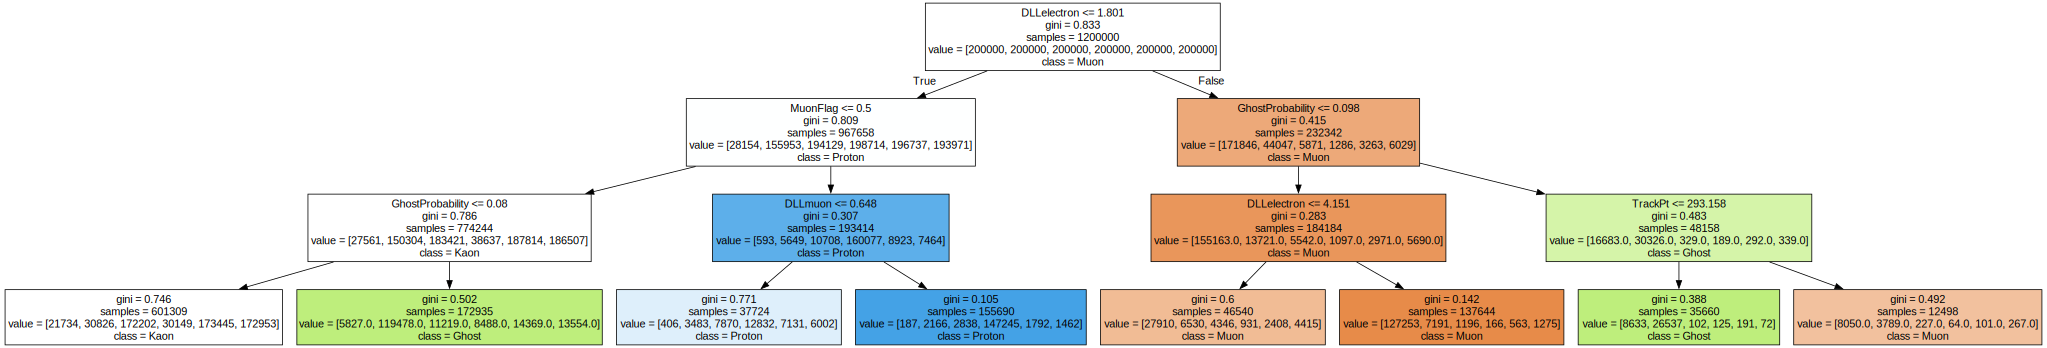

'depth3.png'

In [9]:
feature_cols = [x for x in particles_train.columns if x != "Label"]
feature_set = particles_train[feature_cols]
labels = particles_train["Label"]

treeclf = DecisionTreeClassifier(max_depth=3, random_state=4)
treeclf.fit(feature_set.values, labels)

dot = tree.export_graphviz(treeclf, out_file=None,
feature_names=feature_cols,
class_names=["Muon", "Ghost", "Pion", "Proton", "Kaon", "Electron"], filled=True)

graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

graph = Source(dot, format="png")
graph.render(filename="depth3", directory=".", view=False)

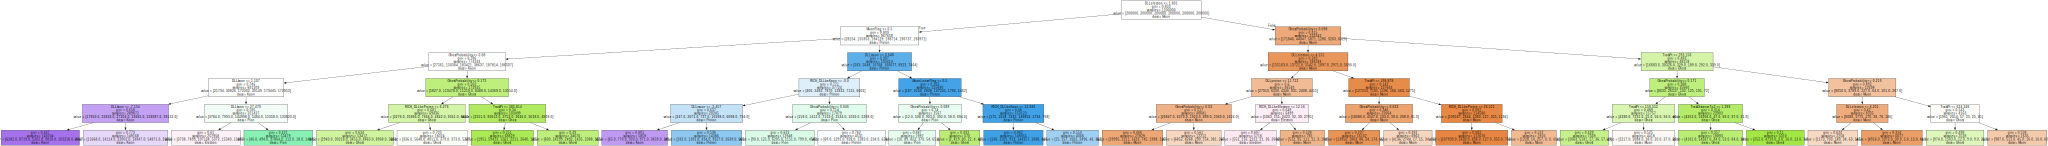

'depth5.png'

In [10]:
feature_cols = [x for x in particles_train.columns if x != "Label"]
feature_set = particles_train[feature_cols]
labels = particles_train["Label"]

treeclf = DecisionTreeClassifier(max_depth=5, random_state=4)
treeclf.fit(feature_set.values, labels)

dot = tree.export_graphviz(treeclf, out_file=None,
feature_names=feature_cols,
class_names=["Muon", "Ghost", "Pion", "Proton", "Kaon", "Electron"], filled=True)

graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

graph = Source(dot, format="png")
graph.render(filename="depth5", directory=".", view=False)